# [ global ]

In [ ]:
# inbuilt 
import os
import sys
import math

# most common
import numpy as np
import matplotlib.pyplot as plt

# pytorch
import torch as tt
import torch.nn as nn
import torch.optim as oo
import torch.functional as ff
import torch.distributions as dd
import torch.utils.data as ud

# custom
import known
import known.ktorch as kt
from known.basic import pj
print(f'{sys.version=}\n{np.__version__=}\n{tt.__version__=}\n{known.__version__=}')

from torch.utils.data import Dataset, IterableDataset, DataLoader
import glob

import unicodedata
import string

import known 
import known.ktorch as kt

In [ ]:
vocab_words = ['a', 'b']
ds = kt.LangDataset(vocab_words, embed=1, dtype=tt.float32)

In [ ]:
known.show(ds)

In [ ]:
known.show(ds.vocab)

In [ ]:
ds.add_class('astr', 'bstr', 'mixed')


In [ ]:
ds.add_samples('astr', 'aaaa', 'aaa', 'aa')
ds.add_samples('bstr', 'bbbb', 'bbb', 'bb')
ds.add_samples('mixed', 'abab', 'aba', 'ba')

In [ ]:
dl=iter(DataLoader(ds, batch_size=1))


In [ ]:
x,y = next(dl)


known.about(x, True)
known.about(y, True)


In [ ]:

rnnc = kt.ELMANX(
    input_size=ds.vocab.vlen,
    hidden_sizes=(32, 16, 8),
    output_sizes=(16, 8, ds.n_classes),
    dropout=0.0,
    batch_first=True,
    stack_output=True,
    cell_bias=True,
    out_bias=True,
    dtype=tt.float32,
    activation_gate=tt.sigmoid,
    activation_out=tt.tanh,
    activation_last=(nn.LogSoftmax,{'dim':-1})
)


In [ ]:

model=rnnc
epochs = 200
batch_size=1
shuffle=True
validation_freq = int(epochs/10)
criterion=nn.NLLLoss()
lr = 0.005
weight_decay = 0.0
optimizer=oo.Adam(rnnc.parameters(), lr=lr, weight_decay=weight_decay)
lrs=oo.lr_scheduler.LinearLR(optimizer, start_factor= 1.0, end_factor=0.7, total_iters=epochs)

early_stop_train=kt.QuantiyMonitor('TrainLoss', patience=50, delta=0.00001)
early_stop_val=kt.QuantiyMonitor('ValLoss', patience=50, delta=0.00001)
checkpoint_freq=int(epochs/4)
save_path='sample.rnn'
loss_plot_start = int(epochs/50)

trainer = kt.Trainer(model)
trainer.optimizer=optimizer
trainer.criterion=criterion

trainer.fit(training_data=ds, validation_data=None, 
            epochs=epochs, batch_size=batch_size,shuffle=shuffle,validation_freq=validation_freq,
            save_path=save_path, use_rnn=True, verbose=1)

trainer.plot_results(loss_plot_start=loss_plot_start)

#mtl, tl = trainer.evaluate(ds,use_rnn=True)
#print('loss', mtl)
print('=================================================')

In [ ]:
def predict(input_line):
    xaxis = ds.classes.keys()
    print('\n> %s' % input_line)
    with tt.no_grad():
        output, *_ = rnnc(tt.unsqueeze(tt.stack([ds.embed(s) for s in input_line]), dim=0))
        print(output.shape)
    
    output=tt.e**output.squeeze(0)
    #print(output)
    for i,ts in enumerate(output):
        plt.figure(figsize=(6,3))
        plt.ylim(0,1)
        plt.title(f'{i+1}')
        plt.bar(xaxis, ts)
        print(f'@{i} :: {ts}, {tt.sum(ts)}')
        plt.show()




In [ ]:
ds.data

aaaa true: astr

> aaaa
torch.Size([1, 4, 3])
@0 :: tensor([0.2010, 0.5133, 0.2856]), 0.9999999403953552


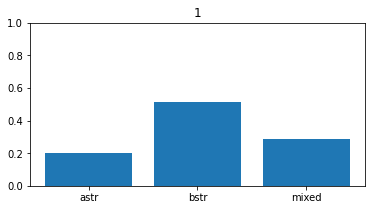

@1 :: tensor([9.8996e-01, 7.1638e-05, 9.9658e-03]), 0.9999999403953552


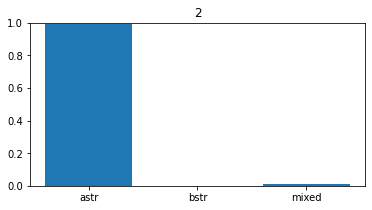

@2 :: tensor([9.7744e-01, 1.2060e-04, 2.2438e-02]), 1.0


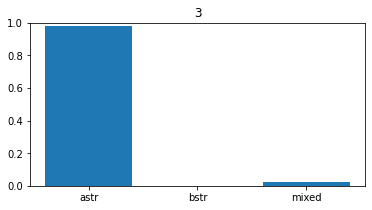

@3 :: tensor([9.7835e-01, 1.2124e-04, 2.1530e-02]), 1.0


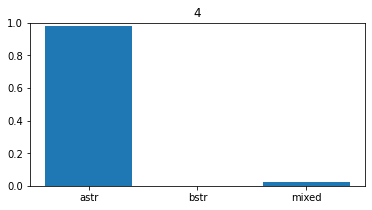

aaa true: astr

> aaa
torch.Size([1, 3, 3])
@0 :: tensor([0.2010, 0.5133, 0.2856]), 0.9999999403953552


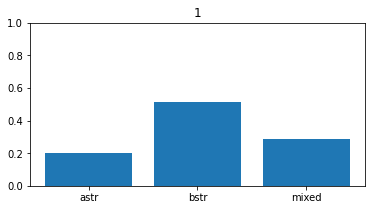

@1 :: tensor([9.8996e-01, 7.1638e-05, 9.9658e-03]), 0.9999999403953552


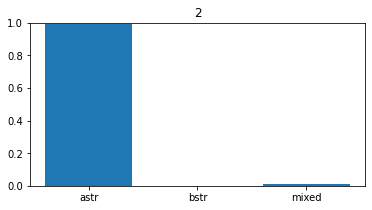

@2 :: tensor([9.7744e-01, 1.2060e-04, 2.2438e-02]), 1.0


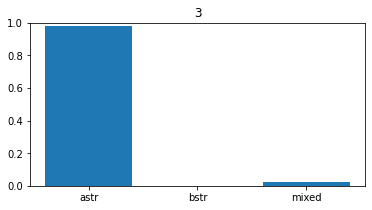

aa true: astr

> aa
torch.Size([1, 2, 3])
@0 :: tensor([0.2010, 0.5133, 0.2856]), 0.9999999403953552


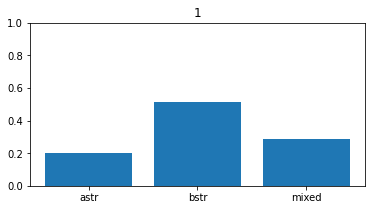

@1 :: tensor([9.8996e-01, 7.1638e-05, 9.9658e-03]), 0.9999999403953552


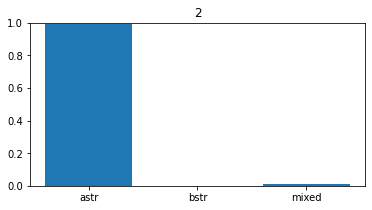

bbbb true: bstr

> bbbb
torch.Size([1, 4, 3])
@0 :: tensor([0.5201, 0.1057, 0.3742]), 1.0


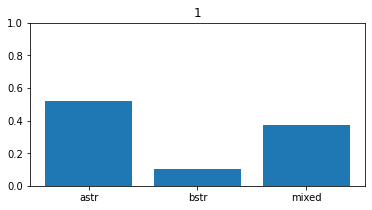

@1 :: tensor([3.9597e-05, 9.8812e-01, 1.1836e-02]), 0.9999999403953552


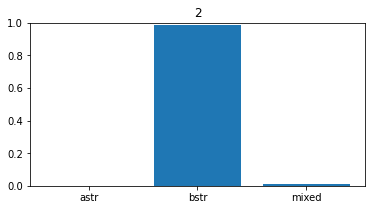

@2 :: tensor([1.9519e-04, 9.9002e-01, 9.7892e-03]), 0.9999999403953552


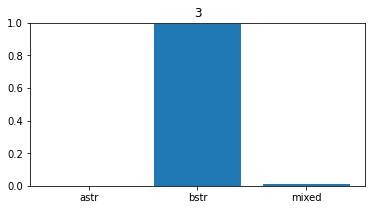

@3 :: tensor([2.1225e-04, 9.8943e-01, 1.0354e-02]), 0.9999999403953552


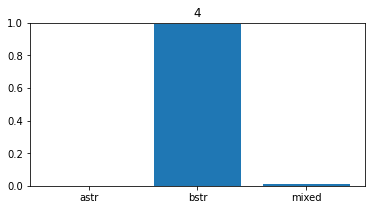

bbb true: bstr

> bbb
torch.Size([1, 3, 3])
@0 :: tensor([0.5201, 0.1057, 0.3742]), 1.0


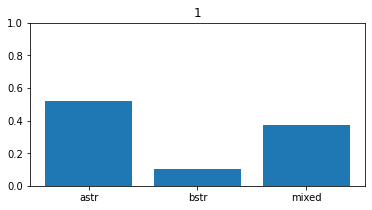

@1 :: tensor([3.9597e-05, 9.8812e-01, 1.1836e-02]), 0.9999999403953552


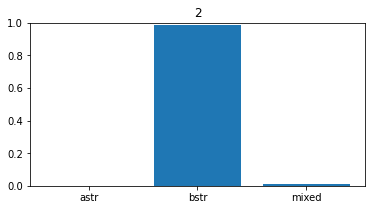

@2 :: tensor([1.9519e-04, 9.9002e-01, 9.7892e-03]), 0.9999999403953552


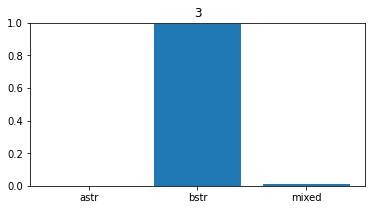

bb true: bstr

> bb
torch.Size([1, 2, 3])
@0 :: tensor([0.5201, 0.1057, 0.3742]), 1.0


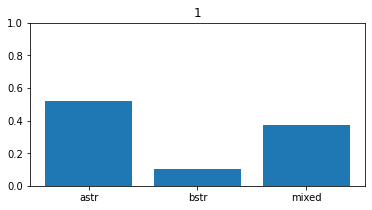

@1 :: tensor([3.9597e-05, 9.8812e-01, 1.1836e-02]), 0.9999999403953552


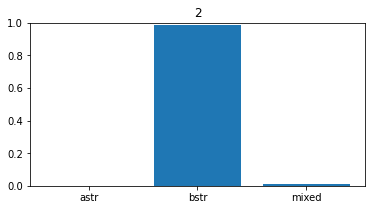

abab true: mixed

> abab
torch.Size([1, 4, 3])
@0 :: tensor([0.2010, 0.5133, 0.2856]), 0.9999999403953552


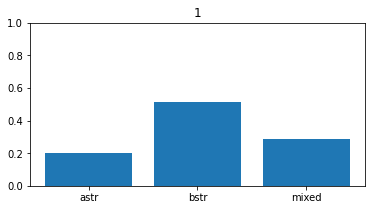

@1 :: tensor([0.0082, 0.0044, 0.9874]), 1.0


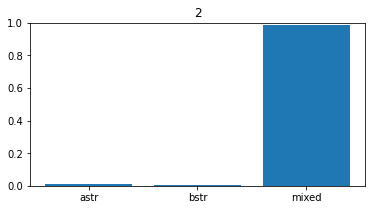

@2 :: tensor([0.0470, 0.0438, 0.9092]), 1.0


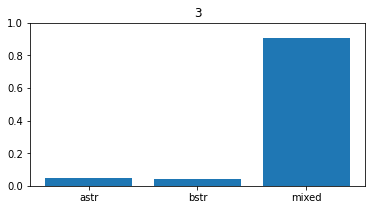

@3 :: tensor([0.0050, 0.0079, 0.9871]), 1.0


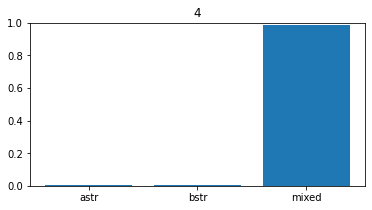

aba true: mixed

> aba
torch.Size([1, 3, 3])
@0 :: tensor([0.2010, 0.5133, 0.2856]), 0.9999999403953552


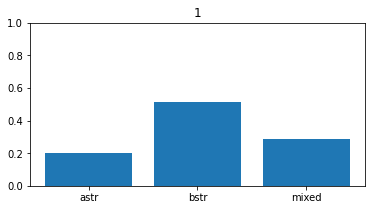

@1 :: tensor([0.0082, 0.0044, 0.9874]), 1.0


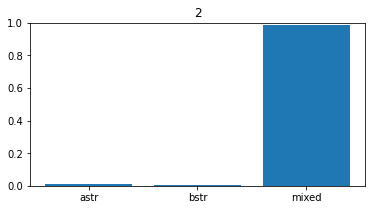

@2 :: tensor([0.0470, 0.0438, 0.9092]), 1.0


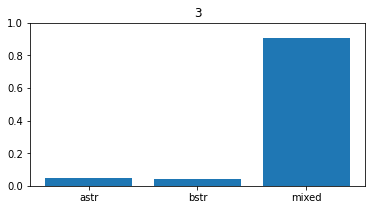

ba true: mixed

> ba
torch.Size([1, 2, 3])
@0 :: tensor([0.5201, 0.1057, 0.3742]), 1.0


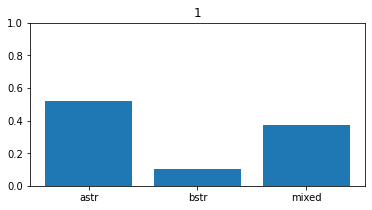

@1 :: tensor([0.0134, 0.0320, 0.9546]), 1.0


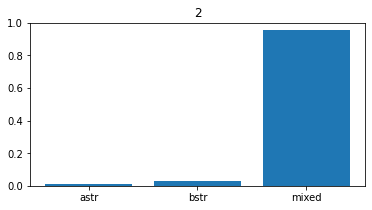

In [21]:
for xv,yv in ds.data:
    print(xv, 'true:', yv)
    predict(xv)
    